# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Ibrahim
- **Email:** baim21121994@gmail.com
- **ID Dicoding:** muhammadibrahim

## Menentukan Pertanyaan Bisnis

- Bagaimana tren dari penyewaan sepeda setiap bulannya pada tahun 2012 dibandingkan dengan tahun 2011?
- Apakah kecepatan angin mempengaruhi penyewaan sepeda pada tahun 2011?
- Bagaimana perbandingan antara penyewaan sepeda di weekend dan weekday pada bulan Mei sampai September tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

#### Menambahkan day.csv ke dalam DataFrame

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head(370)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368


Saya hanya menggunakan dataset day.csv karena isi dari hour.csv tidak relevan dengan pertanyaan bisnis yang ada.

### Assessing Data

#### Memeriksa Tipe Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dalam output tersebut diketahui jika kolom dteday yang memuat tanggal memiliki tipe data object, padahal seharusnya menggunakan tipe data datetime.

#### Memeriksa Data Null

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa Data Duplikat

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


#### Rangkuman Parameter Statistik

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Menghapus Kolom yang Tidak diperlukan

In [7]:
drop_col = ['instant', 'season', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'casual', 'registered']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,yr,mnth,weekday,windspeed,cnt
0,2011-01-01,0,1,6,0.160446,985
1,2011-01-02,0,1,0,0.248539,801
2,2011-01-03,0,1,1,0.248309,1349
3,2011-01-04,0,1,2,0.160296,1562
4,2011-01-05,0,1,3,0.186900,1600


Alasan dihapusnya beberapa kolom tersebut karena tidak relevannya kolom tersebut dengan pertanyaan bisnis

#### Mengubah Nama, Isi, dan Tipe Data Kolom

In [8]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,year,month,weekday,windspeed,count
0,2011-01-01,0,1,6,0.160446,985
1,2011-01-02,0,1,0,0.248539,801
2,2011-01-03,0,1,1,0.248309,1349
3,2011-01-04,0,1,2,0.160296,1562
4,2011-01-05,0,1,3,0.186900,1600


Hal ini dilakukan agar lebih mudah dalam membaca sehingga lebih mudah dipahami

In [9]:
day_df['dateday'] = pd.to_datetime(day_df.dateday)

day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dateday    731 non-null    datetime64[ns]
 1   year       731 non-null    category      
 2   month      731 non-null    category      
 3   weekday    731 non-null    category      
 4   windspeed  731 non-null    float64       
 5   count      731 non-null    int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(1)
memory usage: 20.3 KB


Hal ini dilakukan karen kolom tersebut lebih cocok memiliki tipe data datetime dan juga category

In [10]:
day_df['year'] = day_df['year'].map({
    0: '2011',
    1: '2012',
})

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'weekend',  # Sunday
    1: 'weekday',  # Monday
    2: 'weekday',  # Tuesday
    3: 'weekday',  # Wednesday
    4: 'weekday',  # Thursday
    5: 'weekday',  # Friday
    6: 'weekend'   # Saturday
})

day_df.head()

,dateday,year,month,weekday,windspeed,count
0,2011-01-01,2011,Jan,weekend,0.160446,985
1,2011-01-02,2011,Jan,weekend,0.248539,801
2,2011-01-03,2011,Jan,weekday,0.248309,1349
3,2011-01-04,2011,Jan,weekday,0.160296,1562
4,2011-01-05,2011,Jan,weekday,0.186900,1600


Hal tersebut dilakukan agar data lebih mudah dibaca sehingga mudah dipahami

## Exploratory Data Analysis (EDA)

### Explorasi Pertanyaan 1

#### Membuat DataFrame Penyewa pada Tahun 2012 dan 2011

In [11]:
df_2012 = day_df[day_df['year'] == '2012']
df_2012.head()

,dateday,year,month,weekday,windspeed,count
365,2012-01-01,2012,Jan,weekend,0.192167,2294
366,2012-01-02,2012,Jan,weekday,0.329665,1951
367,2012-01-03,2012,Jan,weekday,0.365671,2236
368,2012-01-04,2012,Jan,weekday,0.184700,2368
369,2012-01-05,2012,Jan,weekday,0.129987,3272


In [12]:
df_2011 = day_df[day_df['year'] == '2011']
df_2011.head()

,dateday,year,month,weekday,windspeed,count
0,2011-01-01,2011,Jan,weekend,0.160446,985
1,2011-01-02,2011,Jan,weekend,0.248539,801
2,2011-01-03,2011,Jan,weekday,0.248309,1349
3,2011-01-04,2011,Jan,weekday,0.160296,1562
4,2011-01-05,2011,Jan,weekday,0.186900,1600


Hal pertama yang dilakukan adalah membagi DataFrame menjadi dua bagian yaitu penyewaan sepeda pada tahun 2011 dan penyewaan sepeda pada tahun 2012.

#### Mencari Jumlah Penyewa Tiap Bulan pada Tahun 2012 dan 2011

In [13]:
monthly_rentals_2012 = df_2012.groupby('month')['count'].sum().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

monthly_rentals_2012.head(12)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7748\611101287.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals_2012 = df_2012.groupby('month')['count'].sum().reindex([


month
Jan     96744
Feb    103137
Mar    164875
Apr    174224
May    195865
Jun    202830
Jul    203607
Aug    214503
Sep    218573
Oct    198841
Nov    152664
Dec    123713
Name: count, dtype: int64

In [14]:
monthly_rentals_2011 = df_2011.groupby('month')['count'].sum().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

monthly_rentals_2011.head(12)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7748\752913559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals_2011 = df_2011.groupby('month')['count'].sum().reindex([


month
Jan     38189
Feb     48215
Mar     64045
Apr     94870
May    135821
Jun    143512
Jul    141341
Aug    136691
Sep    127418
Oct    123511
Nov    102167
Dec     87323
Name: count, dtype: int64

Dari output tersebut diketahui persebaran dari pelanggan tiap bulannya pada tahun 2012. Bisa dilihat apabila terjadi peningkatan penyewa sepeda dari bulan Januari sampai bulan September, kemudian kembali turun sampai bulan Desember. Dimana penyewa terbanyak ada pada bulan September, sedangkan penyewa paling sedikit ada pada bulan Januari.

Sedangkan untuk tren pelanggan tiap bulan pada tahun 2011 juga terjadi peningkatan penyewa sepeda dari bulan Januari sampai bulan Juni, kemudian turun secara perlahan sampai bulan Desember. Penyewa terbanyak tahun 2011 ada pada bulan Juni, sedangkan paling sedikit pada bulan Januari.

Keduanya memiliki tren kenaikan yang cukup signifikan dari bulan Januari hingga Juni di kedua tahun. Namun, setelah Juni, pola mulai berbeda. Tahun 2011 setelah puncaknya di Juni, terjadi penurunan yang cukup landai hingga akhir tahun. Sedangkan tahun 2012 tetap naik hingga puncaknya terjadi di September, kemudian menurun hingga akhir tahun dengan penurunan yang lebih tajam dibandingkan tahun 2011.

### Eksplorasi Pertanyaan 2

#### Membuat DataFrame Kecepatan Angin dan Penyewa pada Tahun 2011

In [15]:
numeric_columns = df_2011[['windspeed', 'count']]
numeric_columns.head(400)

,windspeed,count
0,0.160446,985
1,0.248539,801
2,0.248309,1349
3,0.160296,1562
4,0.186900,1600
...,...,...
360,0.188450,1162
361,0.293961,2302
362,0.119412,2423
363,0.134337,2999


Hal ini dilakukan agar dapat menghitung korelasi antara kecepatan angin dengan jumlah penyewa sepeda pada tahun 2011 menggunakan correlation matrix.

#### Mencari Korelasi

In [16]:
correlation_matrix = numeric_columns.corr()

print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
           windspeed  count
windspeed      1.000 -0.278
count         -0.278  1.000


Dari hasil tersebut dapat disimpulkan bahwa tidak ada hubungan linear yang signifikan antara kecepatan angin dan jumlah penyewa sepeda. Hal tersebut dikarenakan ilai korelasi yang mendekati 0, yang menunjukkan bahwa perubahan pada satu variabel tidak secara langsung menyebabkan perubahan yang signifikan pada variabel lainnya.

### Eksplorasi Pertanyaan 3

#### Membuat DataFrame Bulan Mei - Juli 2012

In [17]:
df_may_jul_2012 = df_2012.query("month in ['May', 'Jun', 'Jul', 'Aug', 'Sep']")
df_may_jul_2012.head(160)

,dateday,year,month,weekday,windspeed,count
486,2012-05-01,2012,May,weekday,0.156096,5740
487,2012-05-02,2012,May,weekday,0.138058,6169
488,2012-05-03,2012,May,weekday,0.133696,6421
489,2012-05-04,2012,May,weekday,0.162938,6296
490,2012-05-05,2012,May,weekend,0.152992,6883
...,...,...,...,...,...,...
634,2012-09-26,2012,Sep,weekday,0.244400,7733
635,2012-09-27,2012,Sep,weekday,0.134342,7393
636,2012-09-28,2012,Sep,weekday,0.164179,7415
637,2012-09-29,2012,Sep,weekend,0.227604,8555


Hal pertama yang dilakukan adalah membagi DataFrame agar hanya memiliki data dari bulan Mei sampai September.

### Membuat Pivot Table yang memuat Data Pengunjung Setiap Bulan pada Weekday dan Weekend

In [18]:
grouped_data_df = df_may_jul_2012.groupby(['month', 'weekday'])['count'].mean().loc[pd.IndexSlice[['May', 'Jun', 'Jul', 'Aug', 'Sep'], :]].reset_index()
grouped_data_df.head(10)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7748\1655242258.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_df = df_may_jul_2012.groupby(['month', 'weekday'])['count'].mean().loc[pd.IndexSlice[['May', 'Jun', 'Jul', 'Aug', 'Sep'], :]].reset_index()


,month,weekday,count
0,May,weekday,6109.826087
1,May,weekend,6917.375000
2,Jun,weekday,6583.666667
3,Jun,weekend,7174.777778
4,Jul,weekday,6836.954545
5,Jul,weekend,5910.444444
6,Aug,weekday,7202.173913
7,Aug,weekend,6106.625000
8,Sep,weekday,7231.350000
9,Sep,weekend,7394.600000


In [19]:
print(grouped_data_df)

  month  weekday        count
0   May  weekday  6109.826087
1   May  weekend  6917.375000
2   Jun  weekday  6583.666667
3   Jun  weekend  7174.777778
4   Jul  weekday  6836.954545
5   Jul  weekend  5910.444444
6   Aug  weekday  7202.173913
7   Aug  weekend  6106.625000
8   Sep  weekday  7231.350000
9   Sep  weekend  7394.600000


Dari pivot table di atas terlihat jika rata rata penyewa pada weekend lebih banyak dibandingkan weekday pada bulan Mei, Juni, dan September. Sedangkan pada bulan Juli dan Agustus lebih banyak rata rata penyewa pada weekday dibandingkan weekend.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

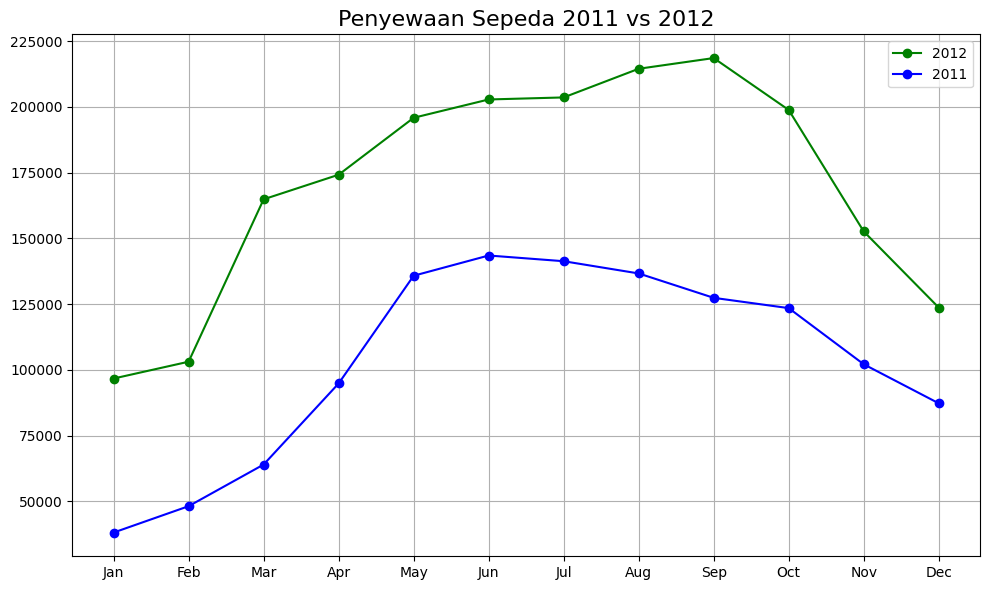

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals_2012.index, monthly_rentals_2012, marker='o', label='2012', color='green')
plt.plot(monthly_rentals_2011.index, monthly_rentals_2011, marker='o', label='2011', color='blue')

# Menambahkan judul dan label
plt.title('Penyewaan Sepeda 2011 vs 2012', fontsize=16)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Dari visualisasi line chart tersebut, dapat ditarik kesimpulan jika tren dari tahun 2011 dan 2012 cukup mirip, dimana awal tahun mengalami penyewaan yang rendah kemudian mengalami peningkatan sampai pertengahan bulan, puncak pada tahun 2011 yaitu pada bulan Juni, sedangkan pada tahun 2012 pada bulan September. Setelahnya keduanya sama-sama mengalami penurunan. Kemudian terlihat juga peningkatan yang cukup signifikan dari frekuensi penyewaan sepeda dimana kurang lebih meningkat sebanyak dua kali lipat.

### Pertanyaan 2:

C:\Users\Asus\AppData\Local\Temp\ipykernel_7748\3649314107.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(windspeed, count, alpha=0.6, color='blue', edgecolors='k',  marker='x')


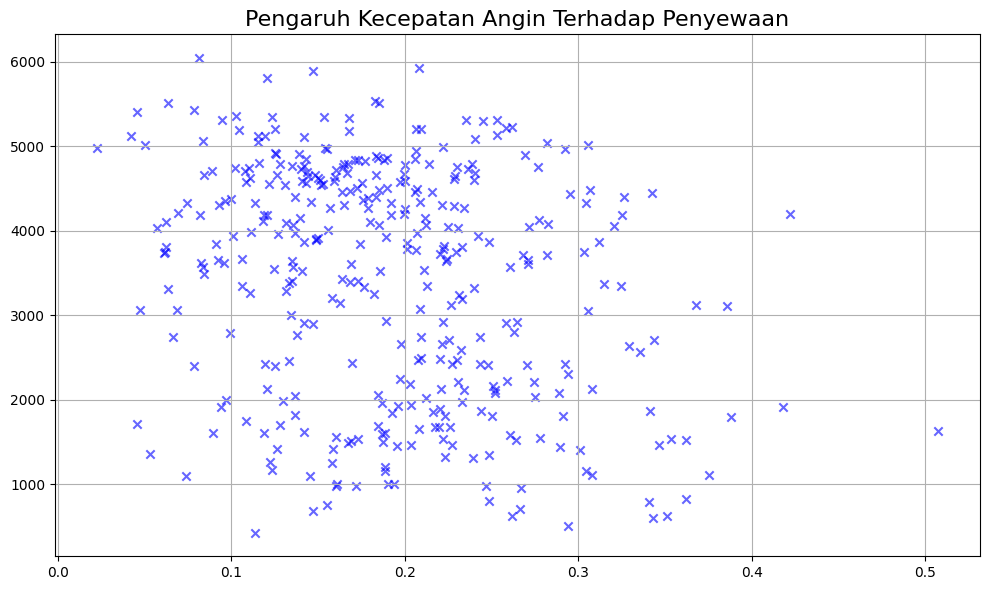

In [21]:
windspeed = df_2011['windspeed']
count = df_2011['count']

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(windspeed, count, alpha=0.6, color='blue', edgecolors='k',  marker='x')

# Menambahkan judul dan label sumbu
plt.title('Pengaruh Kecepatan Angin Terhadap Penyewaan', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

Dalam visualisasi dengan scatter di atas, terlihat dengan jelas jika titik-titik data cenderung sedikit turun, namun masih tersebar dan masih belum  membentuk pola yang jelas. Oleh karena itu dapat disimpulkan jika tidak ada hubungannya antara kecepatan angin dengan jumlah penyewaan sepeda.

### Pertanyaan 3:

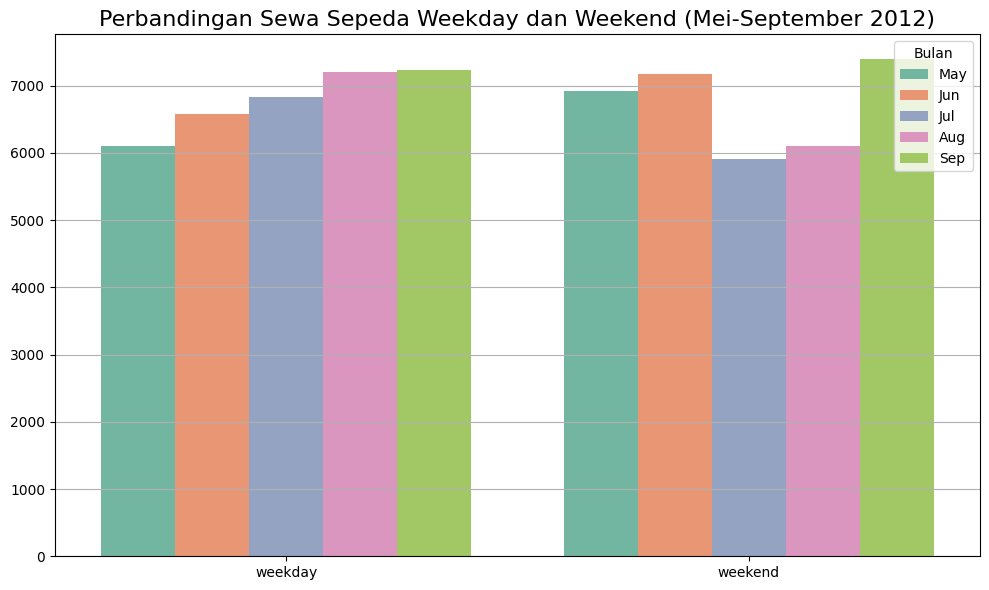

In [22]:
# Buat bar chart dengan customisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='count', hue='month', data=grouped_data_df, palette='Set2', hue_order=['May', 'Jun', 'Jul', 'Aug', 'Sep'])

# Judul dan label
plt.title('Perbandingan Sewa Sepeda Weekday dan Weekend (Mei-September 2012)', fontsize=16)
plt.ylabel('')
plt.xlabel('')
plt.legend(title='Bulan', loc='upper right')
plt.grid(axis='y')

# Tampilkan grafik
plt.tight_layout()
plt.show()

Dari visualisasi dengan clustered bar chart di atas terlihat bahwa secara umum penyewaan sepeda lebih tinggi pada weekend dibandingkan weekday, terutama di bulan Mei, Juni, dan September. Namun, di bulan Juli dan Agustus terjadi pola yang berbeda, di mana penyewaan sepeda pada weekday lebih tinggi daripada weekend. Selain itu, terdapat peningkatan bertahap dalam penyewaan sepeda dari Mei ke Juni, baik pada weekday maupun weekend.

## Conclusion

- Conclusion pertanyaan 1: Penyewaan sepeda pada tahun 2012 secara umum mengalami peningkatan dibandingkan dengan tahun 2011. Setiap bulannya, terlihat bahwa jumlah penyewaan sepeda lebih tinggi di hampir semua bulan pada tahun 2012. Tren ini juga menunjukkan pola yang mirip, di mana pada pertengahan bulan terjadi kenaikan signifikan, terutama di bulan Juni. Misalnya, di bulan Juni 2012, jumlah penyewaan sepeda meningkat dibandingkan dengan Juni 2011, menunjukkan adanya tren kenaikan dalam popularitas penggunaan sepeda di tahun 2012 dibandingkan tahun sebelumnya.

- Conclusion pertanyaan 2: Berdasarkan analisis korelasi antara kecepatan angin (windspeed) dan jumlah penyewaan sepeda (count) pada tahun 2011, ditemukan korelasi yang lemah dan negatif. Ini menunjukkan bahwa kecepatan angin tidak memiliki pengaruh yang signifikan terhadap penyewaan sepeda. Dengan kata lain, meskipun ada sedikit penurunan jumlah penyewaan pada hari-hari dengan kecepatan angin lebih tinggi, pengaruhnya sangat kecil.

- Conclusion pertanyaan 3: Secara umum, penyewaan sepeda pada weekend cenderung lebih tinggi dibandingkan weekday pada bulan Mei hingga September 2012, kecuali pada bulan Juli dan Agustus. Pada bulan Mei, Juni, dan September penyewaan sepeda saat weekend lebih banyak, sedangkan di bulan Juli dan Agustus, penyewaan sepeda pada weekday justru lebih tinggi dibandingkan weekend. Hal ini menunjukkan fluktuasi dalam pola penyewaan sepeda berdasarkan hari dalam seminggu.